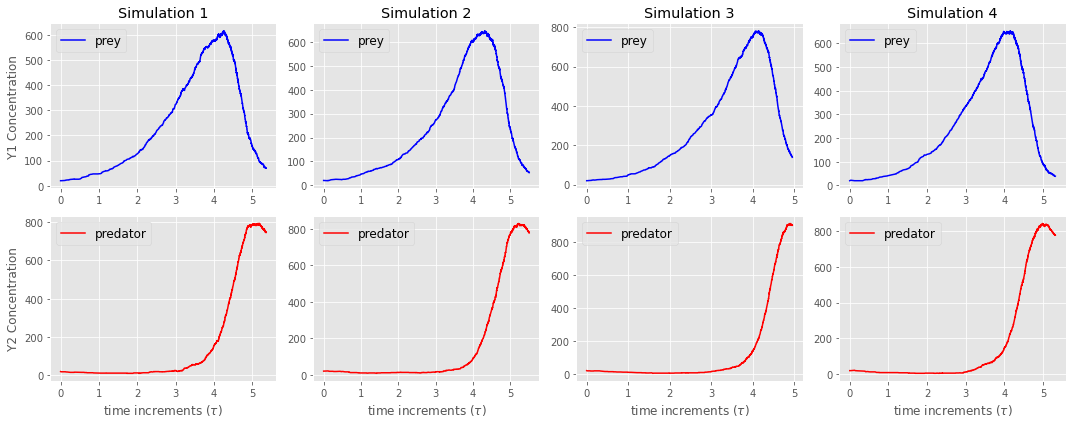

In [73]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def Gillespie_Lotka_Volterra(X0, Y0, c1, c2, c3, n_steps, n_sim):
    
    X, Y, t = [np.zeros((n_sim, n_steps)) for i in range(3)]
    for i in range(n_sim):
        
        X[i,0], Y[i,0] = X0, Y0
        
        for k in range(n_steps-1):

            prop = [a1,a2,a3] = [c1*X[i,k], c2*X[i,k]*Y[i,k], c3*Y[i,k]]    # propensity functions
            v = [[1,0], [-1,1], [0,-1]]    # reaction vectors
            par = [sum(prop[:j]) for j in range(1,4)]    # partial sums of propensities
            
            if par[-1] > 0:
                
                u1 = np.random.uniform(0,1)
                u2 = np.random.uniform(0,1)

                j = next(i for i, val in enumerate(par) if val > u1*par[-1])
                tau = np.log(1/u2)/par[-1]

                t[i,k+1] = t[i,k] + tau
                X[i,k+1] = X[i,k] + v[j][0]
                Y[i,k+1] = Y[i,k] + v[j][1]
                
            else:   
                
                t[i,k+1] = t[i,k]+0.001
                X[i,k+1] = X[i,k] 
                Y[i,k+1] = Y[i,k]
                
    X_aver = np.mean(X, axis=0)  
    Y_aver = np.mean(Y, axis=0)
    t_aver = np.mean(t, axis=0)
        
    return [X, Y, t, X_aver, Y_aver, t_aver]     
        
          
def plots(X0, Y0, c1, c2, c3, n_steps, n_sim):
    
    fig, ax = plt.subplots(2,4, figsize=(15,6))
    
    [X, Y, t, Xmean, Ymean, tmean] = Gillespie_Lotka_Volterra(X0, Y0, c1, c2, c3, n_steps, n_sim)
    
    for i in range(4):
        
        ax[0,i].plot(t[i,:], X[i,:], label='1', color='b')
        ax[1,i].plot(t[i,:], Y[i,:], label='2', color='r')
        ax[0,i].set_title('Simulation %i'%(i+1))
        ax[0,i].legend(['prey'], fontsize=12)
        ax[1,i].legend(['predator'], fontsize=12)
        ax[1,i].set_xlabel(r'time increments ($\tau$)')
        ax[0,0].set_ylabel('Y1 Concentration')
        ax[1,0].set_ylabel('Y2 Concentration')
        plt.tight_layout()
        

X0, Y0 = 20, 20
[c1, c2, c3] = [1,0.005,0.6]
n_steps = 3000
n_sim = 4
plots(X0, Y0, c1, c2, c3, n_steps, n_sim)        

As we can see from the plots when the predator's population size is small, the pray's population size grows and after it reaches a maximum it starts declining. This is when the predator concentration has started growing (becuase of abundance in foods after pray's population has increased). Then the predator size will decline as it runs out of foods.

Next plots shows with parameters chosen above and initial population sizes $20$ for both pray and predator, two scenarios might happen:

1- There is a fluctuation in population size of pray and predator as we can see from simulation 2.

2- The pray goes extinct and so the predator.

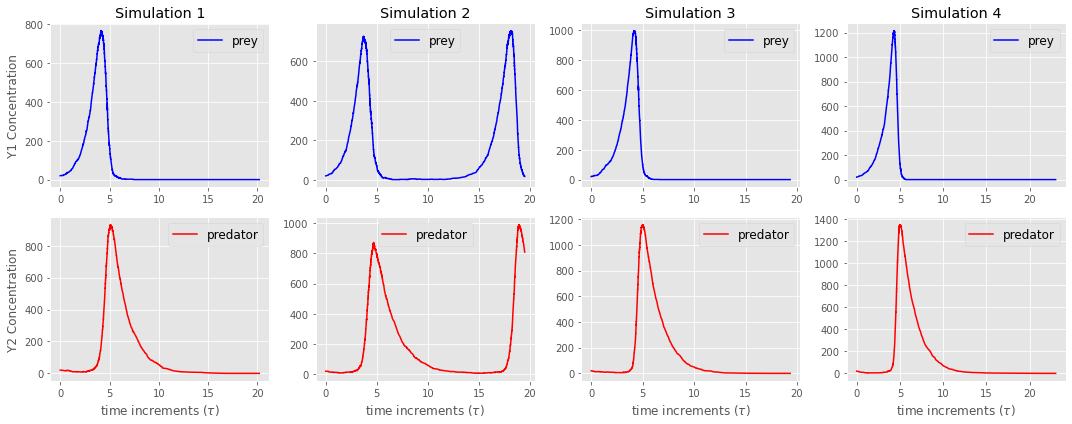

In [75]:
X0, Y0 = 20, 20
[c1, c2, c3] = [1,0.005,0.6]
n_steps = 8000
n_sim = 4
plots(X0, Y0, c1, c2, c3, n_steps, n_sim)   

We expect that if we increase $c_2$ then $Y_1$ goes extinct more likely, because the rate of praying increases. 
We can see this from the next plots. I have chosen $c_2=1$ with other parameters have remained unchanged. 

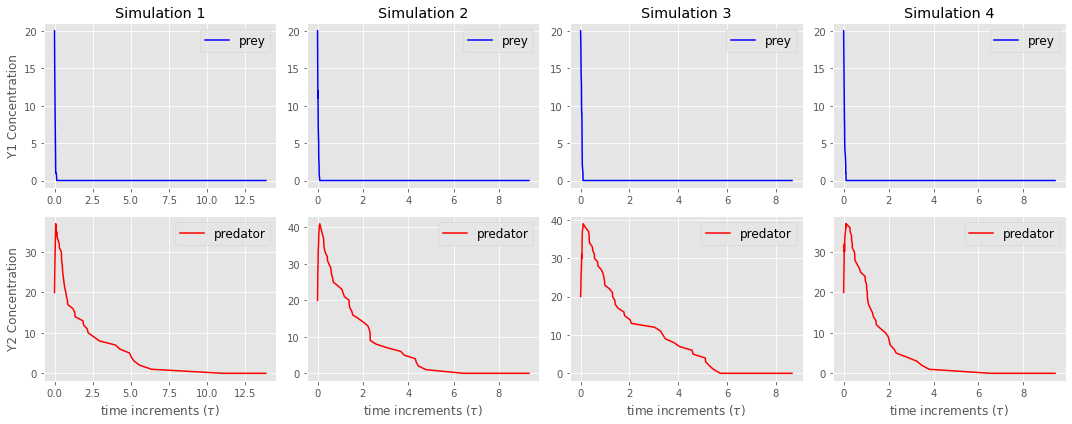

In [78]:
X0, Y0 = 20, 20
[c1, c2, c3] = [1,1,0.6]
n_steps = 3000
n_sim = 4
plots(X0, Y0, c1, c2, c3, n_steps, n_sim)  

moreover if we desrease $c_2$, then $Y_2$ goes extinct more likely as the rate of birth for $Y_2$ decreases. We can see this from next plots. I have decreased $c_2$ to $0.0001$ with other parameters remained unchanged.

In $3$ out of $4$ plots, $Y_2$ has gone extinct.

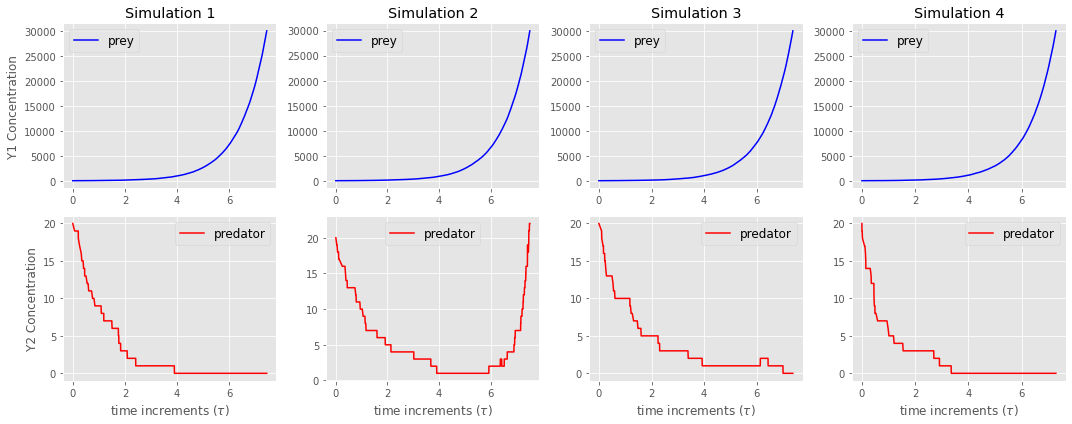

In [96]:
X0, Y0 = 20, 20
[c1, c2, c3] = [1,0.0001,0.6]
n_steps = 30000
n_sim = 4
plots(X0, Y0, c1, c2, c3, n_steps, n_sim) 

Finally if we increase $c_2$, we expect $Y_2$ go extinct more likely because the rate of death for $Y_2$ increases. 

I have chosen $c_3=1$ with other parameters remained unchanged. As we can see agian, in 3 out 4 plots, $Y_2$ has gone extinct.

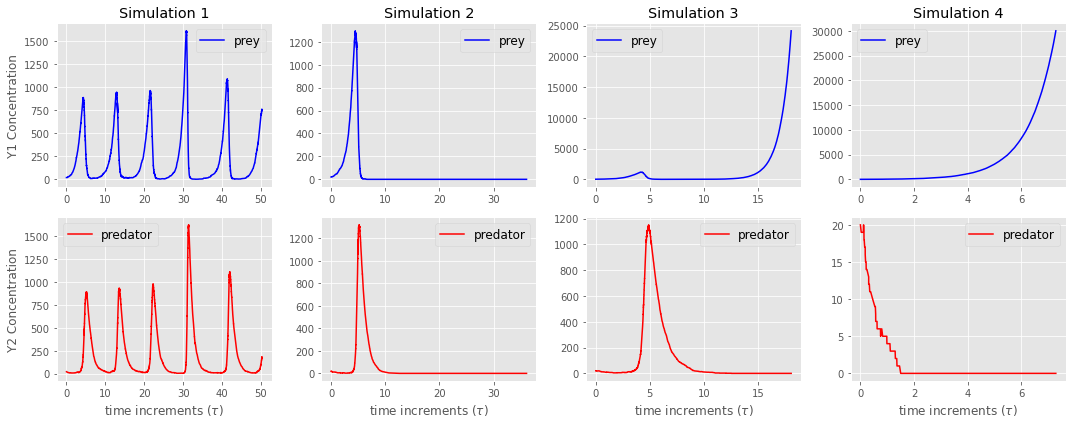

In [98]:
X0, Y0 = 20, 20
[c1, c2, c3] = [1,0.005,1]
n_steps = 30000
n_sim = 4
plots(X0, Y0, c1, c2, c3, n_steps, n_sim) 